In [18]:
import pandas as pd
from pathlib import Path
import json

In [37]:
results_dir = Path("results").resolve()
exp_name = "10M_samples"
grammar_names = [
    "PCFG",
    "PCFGDeterministicShuffle",
    "PCFGNonDeterministicShuffle",
    "PCFGLocalShuffle",
    "PCFGEvenOddShuffle",
    "PCFGNoReverse",
    "PCFGPartialReverse",
    "PCFGFullReverse"
]

results = []
for grammar_name in grammar_names:
    with open(results_dir / f"{exp_name}" / f"{grammar_name}" / "results.json", "r") as f:
        result = json.load(f)
    results.append(
        {
            "grammar_name": grammar_name,
            "Entropy": result["Entropy"],
        }
    )

results_df = pd.DataFrame(results)
results_df['Delta from Base'] = results_df['Entropy'] - results_df[results_df['grammar_name'] == "PCFG"]['Entropy'].values[0]

In [38]:
results_df

,grammar_name,Entropy,Delta from Base
0,PCFG,22.143847,0.000000
1,PCFGDeterministicShuffle,22.144535,0.000688
2,PCFGNonDeterministicShuffle,22.629365,0.485518
3,PCFGLocalShuffle,22.145593,0.001746
4,PCFGEvenOddShuffle,22.145969,0.002122
5,PCFGNoReverse,22.513290,0.369444
6,PCFGPartialReverse,22.514031,0.370185
7,PCFGFullReverse,22.513538,0.369691


<Axes: xlabel='grammar_name', ylabel='Entropy'>

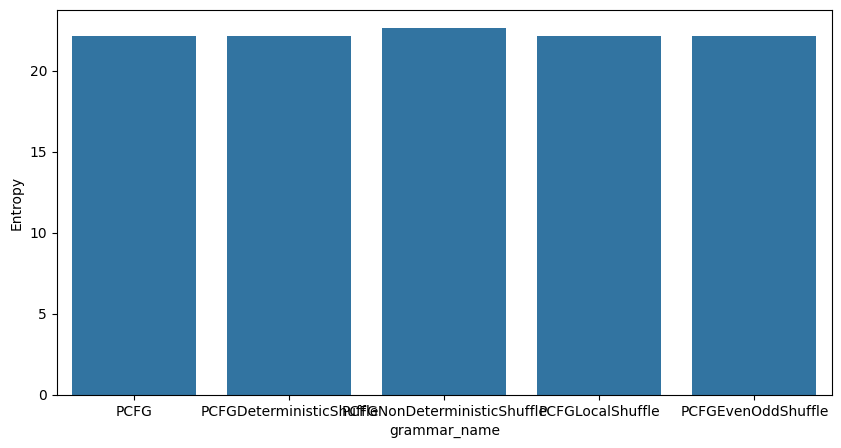

In [30]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x="grammar_name", y="Entropy", data=results_df)